# Disaggregation - Hart Active data only#

##Customary imports##

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from os.path import join
from pylab import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = (13, 6)
plt.style.use('ggplot')
#import nilmtk
from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.disaggregate.hart_85 import Hart85
from nilmtk.disaggregate import CombinatorialOptimisation
from nilmtk.utils import print_dict, show_versions
from nilmtk.metrics import f1_score
#import seaborn as sns
#sns.set_palette("Set3", n_colors=12)

import warnings
warnings.filterwarnings("ignore") #suppress warnings, comment out if warnings required

## show versions for any diagnostics##

In [2]:
#uncomment if required
#show_versions()


##Load dataset##

In [3]:
data_dir = '/Users/GJWood/nilm_gjw_data/HDF5/'
gjw = DataSet(join(data_dir, 'nilm_gjw_data.hdf5'))
print('loaded ' + str(len(gjw.buildings)) + ' buildings')
building_number=1

loaded 1 buildings


#Let us perform our analysis on selected 2 days##

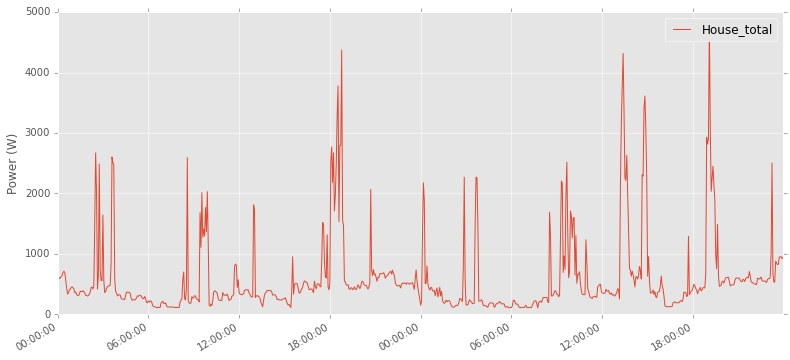

In [4]:
gjw.store.window = TimeFrame(start='2015-09-03 00:00:00+01:00', end='2015-09-05 00:00:00+01:00')
gjw.set_window = TimeFrame(start='2015-09-03 00:00:00+01:00', end='2015-09-05 00:00:00+01:00')
elec = gjw.buildings[building_number].elec
mains = elec.mains()
mains.plot()
#plt.show()

In [5]:
house = elec['fridge'] #only one meter so any selection will do
df = house.load().next() #load the first chunk of data into a dataframe
#df.info() #check that the data is what we want (optional)
#note the data has two columns and a time index


In [6]:
#df.head()

In [7]:
#df.tail()

In [8]:
#df.plot()
#plt.show()

# Hart Training##
We'll now do the training from the aggregate data. The algorithm segments the time series data into steady and transient states. Thus, we'll first figure out the transient and the steady states. Next, we'll try and pair the on and the off transitions based on their proximity in time and value.

In [9]:
#df.ix['2015-09-03 11:00:00+01:00':'2015-09-03 12:00:00+01:00'].plot()# select a time range and plot it
#plt.show()

In [10]:
h = Hart85()
h.train(mains,cols=[('power','active')])


Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.


In [11]:
h.steady_states


,active average
2015-09-03 00:20:37+01:00,701.376344
2015-09-03 00:24:02+01:00,659.000000
2015-09-03 00:34:00+01:00,553.000000
2015-09-03 00:39:34+01:00,321.000000
2015-09-03 01:16:31+01:00,314.000000
2015-09-03 01:29:15+01:00,394.000000
2015-09-03 02:12:24+01:00,430.350000
2015-09-03 02:29:36+01:00,2712.000000
2015-09-03 02:36:56+01:00,2535.000000
2015-09-03 02:37:05+01:00,2584.000000


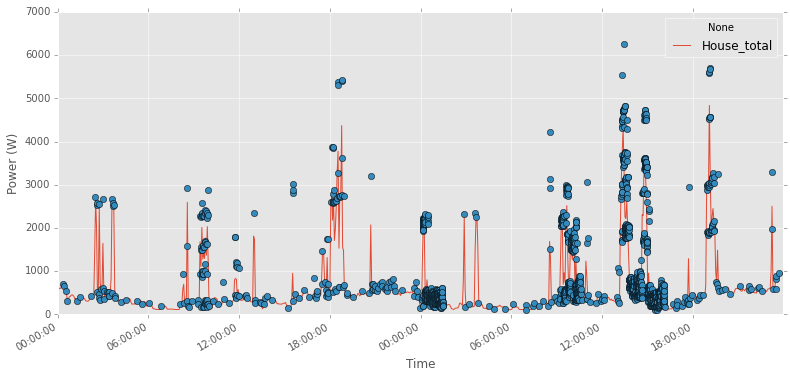

In [12]:
ax = mains.plot()
h.steady_states['active average'].plot(style='o', ax = ax);
plt.ylabel("Power (W)")
plt.xlabel("Time");
#plt.show()

##Hart Disaggregation##

In [13]:
disag_filename = join(data_dir, 'disag_gjw_hart.hdf5')
output = HDFDataStore(disag_filename, 'w')
h.disaggregate(mains,output,sample_period=1)
output.close()

Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.


In [14]:
disag_hart = DataSet(disag_filename)
disag_hart

In [15]:
disag_hart_elec = disag_hart.buildings[building_number].elec
disag_hart_elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='Hart85_2015-10-05T14:26:42', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='Hart85_2015-10-05T14:26:42', appliances=[Appliance(type='unknown', instance=0)])
  ElecMeter(instance=3, building=1, dataset='Hart85_2015-10-05T14:26:42', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=4, building=1, dataset='Hart85_2015-10-05T14:26:42', appliances=[Appliance(type='unknown', instance=2)])
  ElecMeter(instance=5, building=1, dataset='Hart85_2015-10-05T14:26:42', appliances=[Appliance(type='unknown', instance=3)])
  ElecMeter(instance=6, building=1, dataset='Hart85_2015-10-05T14:26:42', appliances=[Appliance(type='unknown', instance=4)])
  ElecMeter(instance=7, building=1, dataset='Hart85_2015-10-05T14:26:42', appliances=[Appliance(type='unknown', instance=5)])
)

##Combinatorial Optimisation training##

In [16]:
co = CombinatorialOptimisation()
co.train(mains,cols=[('power','active')])


AttributeError: 'ElecMeter' object has no attribute 'meters'

In [ ]:
co.steady_states

In [ ]:
ax = mains.plot()
co.steady_states['active average'].plot(style='o', ax = ax);
plt.ylabel("Power (W)")
plt.xlabel("Time");

In [ ]:
disag_filename = join(data_dir, 'disag_gjw_co.hdf5')
output = HDFDataStore(disag_filename, 'w')
co.disaggregate(mains,output,sample_period=1)
output.close()

##Can't use because no test data for comparison##

In [17]:
from nilmtk.metrics import f1_score
f1_hart= f1_score(disag_hart_elec, test_elec)
f1_hart.index = disag_hart_elec.get_labels(f1_hart.index)
f1_hart.plot(kind='barh')
plt.ylabel('appliance');
plt.xlabel('f-score');
plt.title("Hart");

NameError: name 'test_elec' is not defined